In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
(trainx,trainy),(testx,testy) = keras.datasets.mnist.load_data()

In [2]:
trainx=trainx/255.0
testx=testx/255.0

In [3]:
import pickle
traintss=pickle.load(open('righttss.pkl', 'rb'))
testtss=pickle.load(open('testtss.pkl', 'rb'))


In [8]:
trainx=np.array(trainx)
trainx=trainx.astype(np.float32)
testx=np.array(testx)
testx=testx.astype(np.float32)
traintss=np.array(traintss)
traintss=traintss.astype(np.float32)
testtss=np.array(testtss)
testtss=testtss.astype(np.float32)



In [34]:
import tensorflow.keras.layers as KL
import tensorflow.keras.models as KM
input=KL.Input(shape=(28,28,1))
conv1=KL.Conv2D(16,(3,3),padding="same",activation="relu")(input)
max1=KL.MaxPooling2D(2)(conv1)
conv2=KL.Conv2D(32,(3,3),padding="same",activation="relu")(max1)
max2=KL.MaxPooling2D(2)(conv2)
conv3=KL.Conv2D(64,(3,3),padding="same",activation="relu")(max2)
transconv1=KL.Conv2DTranspose(32,(2,2),strides=(2,2),padding="same")(conv3)
transconv1=KL.Concatenate()([transconv1,conv2])
conv4=KL.Conv2D(32,(3,3),padding="same",activation="relu")(transconv1)
transconv2=KL.Conv2DTranspose(16,(2,2),strides=(2,2),padding="same")(conv4)
transconv2=KL.Concatenate()([transconv2,conv1])
output=KL.Conv2D(1,(3,3),padding="same",activation="sigmoid")(transconv2)
customunet=KM.Model(input,output)
customunet.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_67 (Conv2D)              (None, 28, 28, 16)   160         input_9[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_16 (MaxPooling2D) (None, 14, 14, 16)   0           conv2d_67[0][0]                  
__________________________________________________________________________________________________
conv2d_68 (Conv2D)              (None, 14, 14, 32)   4640        max_pooling2d_16[0][0]           
____________________________________________________________________________________________

In [35]:
customunet.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy)

In [36]:
customunet.fit(trainx,traintss,batch_size=512,epochs=5)

Epoch 1/5
118/118 [==============================] - 128s 1s/step - loss: 10.5601
Epoch 2/5
118/118 [==============================] - 127s 1s/step - loss: 7.6919
Epoch 3/5
118/118 [==============================] - 133s 1s/step - loss: 7.5602
Epoch 4/5
118/118 [==============================] - 127s 1s/step - loss: 7.5136
Epoch 5/5
118/118 [==============================] - 130s 1s/step - loss: 7.4887


In [37]:
predictions=customunet.predict(testx)

In [42]:
result = predictions[0][:, :, 0]


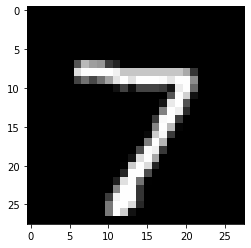

In [50]:
plt.imshow(testx[0],cmap='gray')

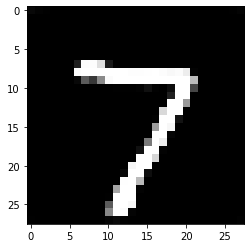

In [45]:
plt.imshow(result,cmap='gray')

In [48]:
thres=np.zeros((28,28))
for i in range(28):
    for j in range(28):
        if result[i][j]>=0.5:
            thres[i][j]=1

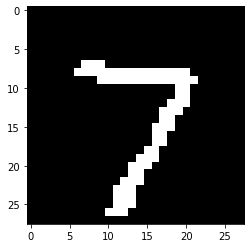

In [49]:
plt.imshow(thres,cmap='gray')

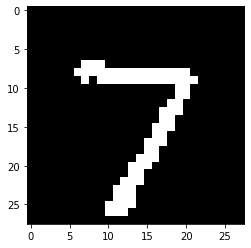

In [51]:
plt.imshow(testtss[0],cmap='gray')

In [53]:
def jaccardfinder(im1,im2):
    intersection=0
    class1=0
    class2=0
    for i in range(28):
        for j in range(28):
            if im1[i][j]==1:
                class1=class1+1
            if im2[i][j]==1:
                class2=class2+1
            if im1[i][j]==1 and im2[i][j]==1:
                intersection=intersection+1
    return (intersection)/(class1+class2-intersection)

In [54]:
thresholdedpreds=[]
for i in range(10000):
    result = predictions[i][:, :, 0]
    thres=np.zeros((28,28))
    for i in range(28):
        for j in range(28):
            if result[i][j]>=0.5:
                thres[i][j]=1
    thresholdedpreds.append(thres)
            


    

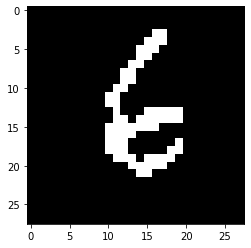

In [56]:
plt.imshow(thresholdedpreds[2000],cmap='gray')

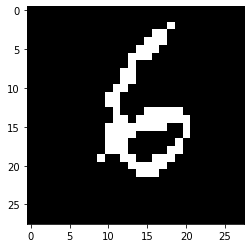

In [57]:
plt.imshow(testtss[2000],cmap='gray')

In [58]:
avgjaccardscore=0
for i in range(10000):
    avgjaccardscore=avgjaccardscore+jaccardfinder(thresholdedpreds[i],testtss[i])

In [59]:
avgjaccardscore=avgjaccardscore/10000

In [60]:
avgjaccardscore

0.9446235516891592

In [62]:
from keras.models import load_model

customunet.save('foregroundextractorQ2.h5')

In [63]:
import pickle
file_name = "threshholdedpreds.pkl"

open_file = open(file_name, "wb")
pickle.dump(thresholdedpreds, open_file)
open_file.close()